In [1]:
pip install pytrends

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/4.0 MB 2.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.8/4.0 MB 1.6 MB/s eta 0:00:03
   ------- -------------------------------- 0.8/4.0 MB 1.6 MB/s eta 0:00:03
   ------------- -------------------------- 1.3/4.0 MB 1.3 MB/s eta 0:00:03
   -------------------- ------------------- 2.1/4.0 MB 1.7 MB/s eta 0:00:02
   -------------------------- ------------- 2.6/4.0 MB 1.9 MB/s eta 0:00:01
   -------------------------- ------------- 2.6/4.0 MB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 3.1/4.0 MB 1.7 MB/s eta 0:00:01
   ------------------------------------ --- 3.7/4.0 MB 1.8 MB/s eta 0:00:01
   ----------------------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq 

In [4]:
# Setup Pytrend library and keyword define

In [5]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "cloud computing"

# Data Request, Write a code where, by changing just the keyword, we can search for multiplr things.

In [10]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo = '', gprop = '')

# Top 15 countries where the keywords are searched the most, and also create visual representation.

In [13]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

C:\Users\satyam tripathi\AppData\Local\Temp\ipykernel_6828\2857290060.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




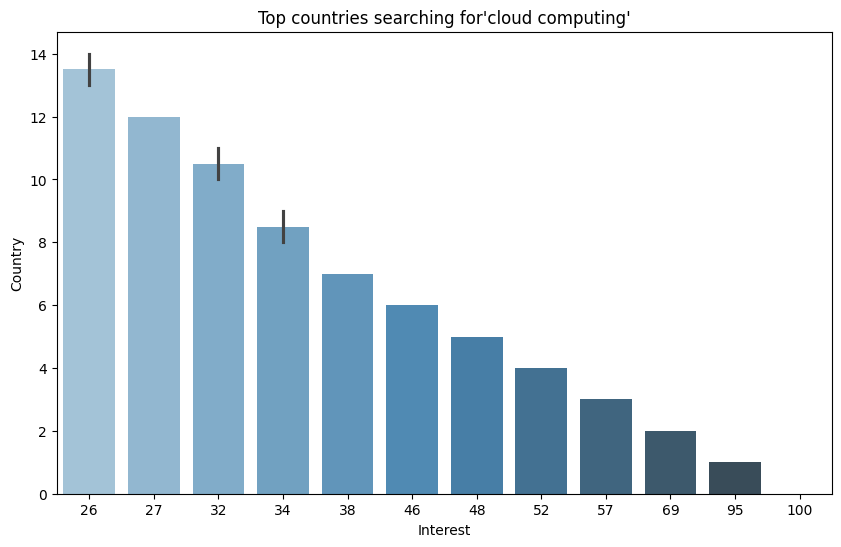

In [23]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Blues_d")
plt.title(f"Top countries searching for'{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# A World map needs to be plotted showing the countries that search the keyword the most.

In [20]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations = 'geoName',
                    locationmode = 'country names',
                    color = keyword,
                    title = f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()

C:\Users\satyam tripathi\AppData\Local\Temp\ipykernel_6828\4210880053.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



# We need to extract the time-wise interest of the keyword- how it trended in different years.

In [21]:
time_df = pytrends.interest_over_time()

C:\Users\satyam tripathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



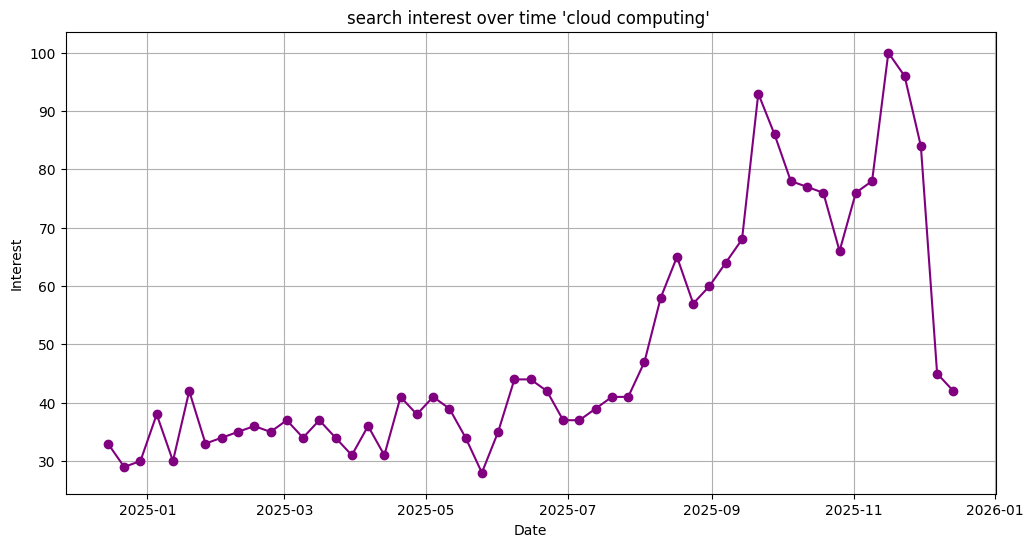

In [28]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = 'purple')
plt.title(f"search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Compare related keywords and plot the graph.

In [29]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe = 'today 12-m', geo = '', gprop='')

C:\Users\satyam tripathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



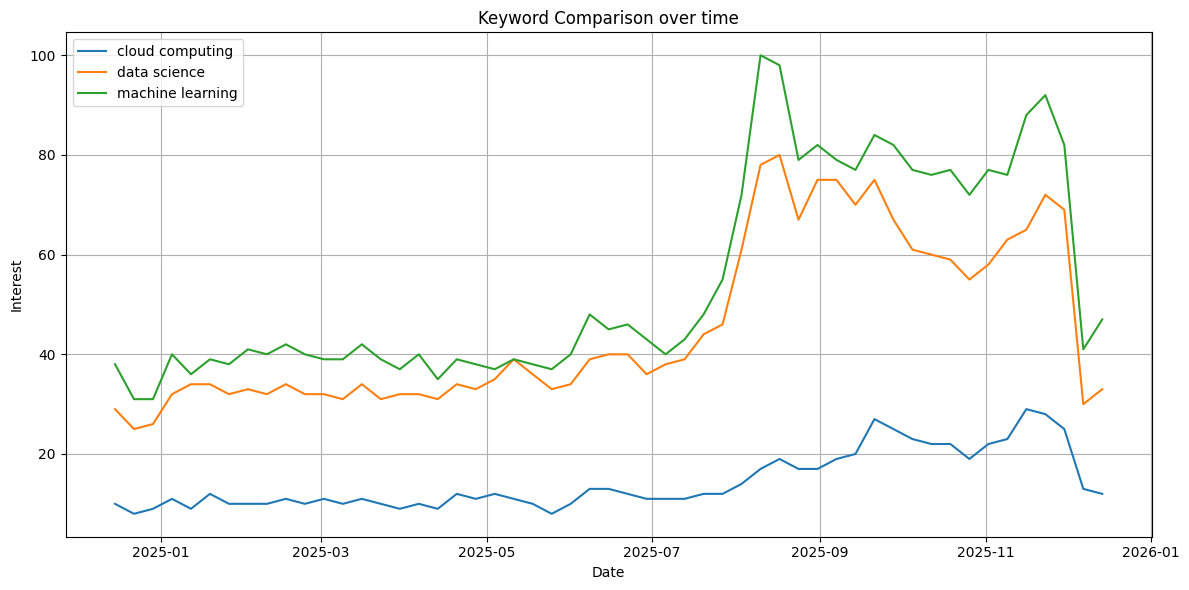

In [30]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("Keyword Comparison over time") 
plt.xlabel('Date') 
plt.ylabel('Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()  